In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("masterClean.csv")
df.head(20)

Unnamed: 0  country  year     sex          age  suicides_no  population  \
0            0  Albania  1987    male  15-24 years           21      312900   
1            1  Albania  1987    male  35-54 years           16      308000   
2            2  Albania  1987  female  15-24 years           14      289700   
3            3  Albania  1987    male    75+ years            1       21800   
4            4  Albania  1987    male  25-34 years            9      274300   
5            5  Albania  1987  female    75+ years            1       35600   
6            6  Albania  1987  female  35-54 years            6      278800   
7            7  Albania  1987  female  25-34 years            4      257200   
8            8  Albania  1987    male  55-74 years            1      137500   
9            9  Albania  1987  female   5-14 years            0      311000   
10          10  Albania  1987  female  55-74 years            0      144600   
11          11  Albania  1987    male   5-14 years            0      338200   
12          12  Albania  1988  female    75+ years            2       36400   
13          13  Albania  1988    male  15-24 years           17      319200   
14          14  Albania  1988    male    75+ years            1       22300   
15          15  Albania  1988    male  35-54 years           14      314100   
16          16  Albania  1988    male  55-74 years            4      140200   
17          17  Albania  1988  female  15-24 years            8      295600   
18          18  Albania  1988  female  55-74 years            3      147500   
19          19  Albania  1988  female  25-34 years            5      262400   

    suicides/100k pop country-year  gdp_for_year ($)   gdp_per_capita ($)  \
0                6.71  Albania1987      2,156,624,900                 796   
1                5.19  Albania1987      2,156,624,900                 796   
2                4.83  Albania1987      2,156,624,900                 796   
3                4.59  Albania1987      2,156,624,900                 796   
4                3.28  Albania1987      2,156,624,900                 796   
5                2.81  Albania1987      2,156,624,900                 796   
6                2.15  Albania1987      2,156,624,900                 796   
7                1.56  Albania1987      2,156,624,900                 796   
8                0.73  Albania1987      2,156,624,900                 796   
9                0.00  Albania1987      2,156,624,900                 796   
10               0.00  Albania1987      2,156,624,900                 796   
11               0.00  Albania1987      2,156,624,900                 796   
12               5.49  Albania1988      2,126,000,000                 769   
13               5.33  Albania1988      2,126,000,000                 769   
14               4.48  Albania1988      2,126,000,000                 769   
15               4.46  Albania1988      2,126,000,000                 769   
16               2.85  Albania1988      2,126,000,000                 769   
17               2.71  Albania1988      2,126,000,000                 769   
18               2.03  Albania1988      2,126,000,000                 769   
19               1.91  Albania1988      2,126,000,000                 769   

         generation continent  
0      Generation X        EU  
1            Silent        EU  
2      Generation X        EU  
3   G.I. Generation        EU  
4           Boomers        EU  
5   G.I. Generation        EU  
6            Silent        EU  
7           Boomers        EU  
8   G.I. Generation        EU  
9      Generation X        EU  
10  G.I. Generation        EU  
11     Generation X        EU  
12  G.I. Generation        EU  
13     Generation X        EU  
14  G.I. Generation        EU  
15           Silent        EU  
16  G.I. Generation        EU  
17     Generation X        EU  
18  G.I. Generation        EU  
19          Boomers        EU

In [3]:
#df.drop(columns=["Unnamed: 0"], inplace=True)
df["continent"] = df["continent"].fillna("NA")

In [4]:
df["age"].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

# 1. Analisis global
## Tendencia global

In [5]:
#Suicidios globales por cada 100k habitantes, 1985-2015.  X=year Y=Suicidios/100k
df_Tendencia = df[["year","suicides_no","population"]]

In [6]:
df_Tendencia

year  suicides_no  population
0      1987           21      312900
1      1987           16      308000
2      1987           14      289700
3      1987            1       21800
4      1987            9      274300
...     ...          ...         ...
27649  2014          107     3620833
27650  2014            9      348465
27651  2014           60     2762158
27652  2014           44     2631600
27653  2014           21     1438935

[27654 rows x 3 columns]

In [7]:
df_groupT = df_Tendencia.groupby("year")

In [8]:
for name,groups in df_groupT:
    print(name)
    print(groups)

1985
       year  suicides_no  population
264    1985            0        7709
265    1985            0        6344
266    1985            0        6173
267    1985            0        7339
268    1985            0        3778
...     ...          ...         ...
27061  1985           16      347300
27062  1985            5      240000
27063  1985            3      203000
27064  1985            2      263100
27065  1985            1      271000

[564 rows x 3 columns]
1986
       year  suicides_no  population
276    1986            0        7668
277    1986            0        6209
278    1986            0        6101
279    1986            0        6907
280    1986            0        3764
...     ...          ...         ...
27073  1986           12      241800
27074  1986            8      204500
27075  1986            8      349600
27076  1986            2      273000
27077  1986            0      265000

[576 rows x 3 columns]
1987
       year  suicides_no  population
0      1987 

In [9]:
population = df_groupT["population"].sum()

In [10]:
population = population[0:-1]

In [11]:
population

year
1985    1008533686
1986    1029909613
1987    1095029726
1988    1054094424
1989    1225514347
1990    1466581000
1991    1489949284
1992    1569500347
1993    1530416654
1994    1548749372
1995    1591559103
1996    1662267662
1997    1702991519
1998    1725181351
1999    1776337963
2000    1799202539
2001    1755565489
2002    1822152815
2003    1838458020
2004    1745246613
2005    1734881381
2006    1840908837
2007    1859564353
2008    1860620851
2009    1973620817
2010    1994548889
2011    1989236841
2012    1912812088
2013    1890161710
2014    1904772042
2015    1774657932
Name: population, dtype: int64

In [12]:
suicides = df_groupT["suicides_no"].sum()
suicides = suicides[:-1]
suicides

year
1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256117
2000    255831
2001    250652
2002    256095
2003    256079
2004    240861
2005    234374
2006    233361
2007    233408
2008    235447
2009    243474
2010    238689
2011    236437
2012    230160
2013    223199
2014    222664
2015    203640
Name: suicides_no, dtype: int64

In [13]:
suicides_per_100k = ((suicides/population)*100000).tolist()

In [14]:
suicides_per_100k

[11.508093543243334,
 11.716562160100937,
 11.583429836497425,
 11.481514107696295,
 13.075652716124424,
 13.184474638632302,
 13.290385258509243,
 13.473905909241573,
 14.477430013643854,
 14.983896309854323,
 15.302227830617989,
 14.842675800066186,
 14.136594182299039,
 14.46752249294399,
 14.418258537212832,
 14.219132891074695,
 14.277564783001951,
 14.054529230030578,
 13.929009921042416,
 13.80097220678577,
 13.509511518586065,
 12.676401748404448,
 12.551757061993971,
 12.654216998237864,
 12.33641223799475,
 11.96706690502185,
 11.88581445541406,
 12.032546293695317,
 11.808460557589012,
 11.689797786311692,
 11.474887431996668]

In [15]:
years = df["year"].unique().tolist()
years = years[:-1]
years.sort()
years

[1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [16]:
#Algunos parametros para graficar antes.
font1 = {'family':'sans serif','color':'black','size':20}
titulo = "Suicidios Globales(p/100k)"
subtitulo = "Tendencia a lo largo del tiempo, 1985-2015"

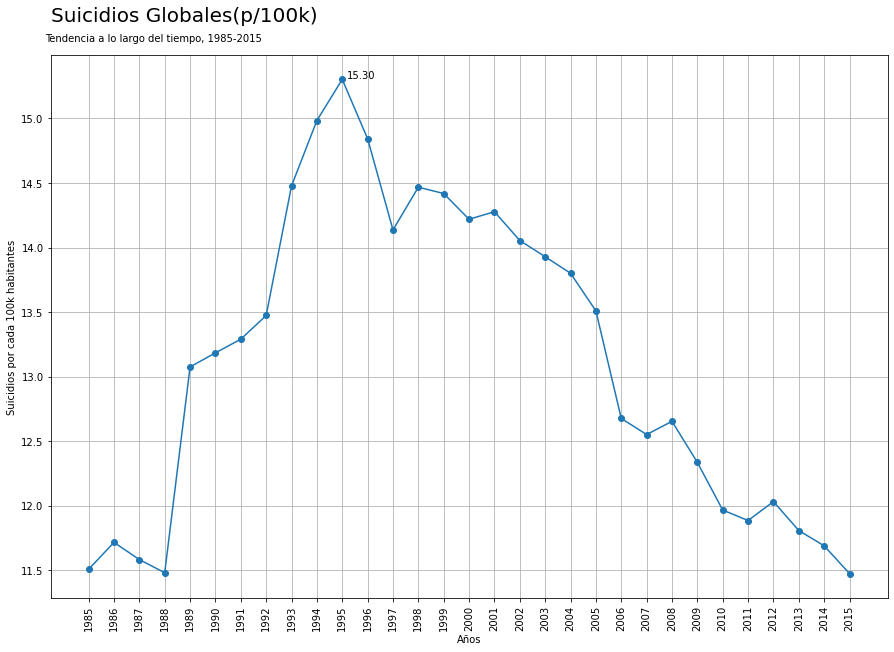

In [17]:
#Ahora si a graficar.
plt.figure(figsize=(15,10))
plt.suptitle(subtitulo,fontsize=10,x=0.22,y=0.91)
plt.title(titulo,fontdict=font1,loc="left",x=0,y=1.05)
plt.xlabel("Años")
plt.ylabel("Suicidios por cada 100k habitantes")
plt.xticks(years,rotation=90)
plt.grid(True)
plt.annotate("15.30",(1995.2,15.31))
plt.plot(years,suicides_per_100k,'-o')

### Insights 
* Del año 1988-1989 hubo un crecimiento drastico (que pudo desencadenarlo?).
* El maximo pico de suicidios se alcanzo en 1995 con un promedio de 15.3 muertes por cada 100k habitantes.
* La tasa de suicidios se redujo de forma constante hasta el 2015(ultimo año analizado)
* La tasa apenas se redujo hasta lo previo a los 90 (que ocurrio?)

## Por continente

In [18]:
df_Tendencia_Cont = df[["year","suicides_no","population","continent"]]

In [19]:
df_Tendencia_Cont

year  suicides_no  population continent
0      1987           21      312900        EU
1      1987           16      308000        EU
2      1987           14      289700        EU
3      1987            1       21800        EU
4      1987            9      274300        EU
...     ...          ...         ...       ...
27649  2014          107     3620833        AS
27650  2014            9      348465        AS
27651  2014           60     2762158        AS
27652  2014           44     2631600        AS
27653  2014           21     1438935        AS

[27654 rows x 4 columns]

In [20]:
df_groupT_C = df_Tendencia_Cont.groupby("continent")

In [21]:
for names,groups in df_groupT_C:
    print(names)
    print(groups)

AF
       year  suicides_no  population continent
16134  1985            2        8800        AF
16135  1985           19       88500        AF
16136  1985           18       89500        AF
16137  1985            9       45300        AF
16138  1985           21      109400        AF
...     ...          ...         ...       ...
23357  2015           26     6396045        AF
23358  2015            2      615701        AF
23359  2015           10     3155486        AF
23360  2015           11     5318168        AF
23361  2015            6     5243427        AF

[838 rows x 4 columns]
AS
       year  suicides_no  population continent
960    1990           25      332700        AS
961    1990            2       26900        AS
962    1990           11      183800        AS
963    1990           16      307100        AS
964    1990           15      358000        AS
...     ...          ...         ...       ...
27649  2014          107     3620833        AS
27650  2014            9      

In [22]:
continentes = df["continent"].unique().tolist()
continentes.sort() #NA = North America, SA = South America

In [23]:
suicides_C = df_groupT_C["suicides_no"].sum()
suicides_C

continent
AF      11313
AS    1455692
EU    3408125
NA    1340639
OC      84851
SA     446980
Name: suicides_no, dtype: int64

In [24]:
population_C = df_groupT_C["population"].sum()

In [25]:
population_C

continent
AF      907935487
AS    10142834343
EU    18842703778
NA    12746171957
OC      654397213
SA     8008918797
Name: population, dtype: int64

In [26]:
suicides_per_100k_C = (suicides_C/population_C)*100000
suicides_per_100k_C

continent
AF     1.246014
AS    14.351925
EU    18.087240
NA    10.517974
OC    12.966284
SA     5.581028
dtype: float64

In [27]:
suicides_per_100k_C = list(suicides_per_100k_C)
suicides_per_100k_C

[1.2460136388522944,
 14.351925219055111,
 18.08723970908672,
 10.517973588640798,
 12.966283827984459,
 5.5810279930348505]

### Grafica suicidios por continente(per 100k)

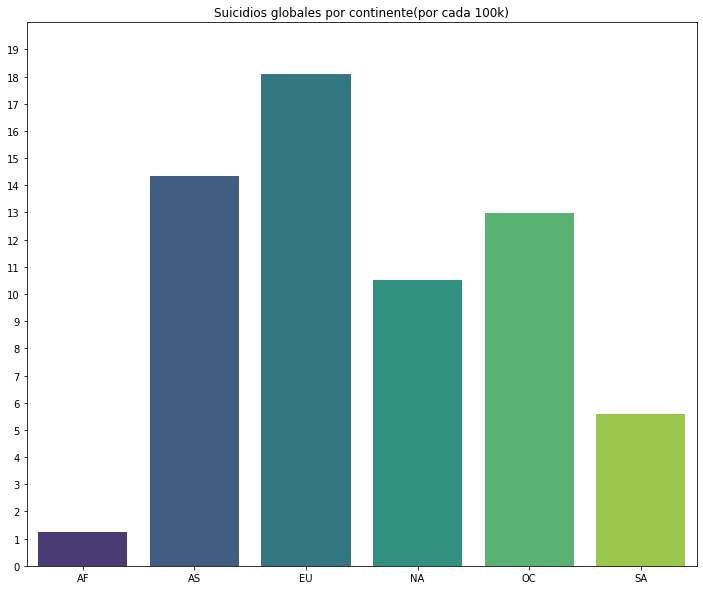

In [28]:
plt.figure(figsize=(12,10))
plt.title("Suicidios globales por continente(por cada 100k)")
plt.ylim([0,20])
plt.yticks(np.arange(0,20,step=1))
sns.barplot(x = continentes,y = suicides_per_100k_C,palette = "viridis")
plt.show()

### Tendencia de suicidios a lo largo del tiempo, por continente

In [29]:
#X = Años, Y = ratio por año
df_groupT_C1 = df_Tendencia_Cont.groupby(["year","continent"])

In [30]:
for names,groups in df_groupT_C1:
    print(names)
    print(groups)

(1985, 'AF')
       year  suicides_no  population continent
16134  1985            2        8800        AF
16135  1985           19       88500        AF
16136  1985           18       89500        AF
16137  1985            9       45300        AF
16138  1985           21      109400        AF
16139  1985           18      106300        AF
16140  1985            4       47900        AF
16141  1985            6       87200        AF
16142  1985            6       90500        AF
16143  1985            1      104700        AF
16144  1985            0      100900        AF
16145  1985            0        4400        AF
22018  1985            3        4400        AF
22019  1985            3        7700        AF
22020  1985            1        2800        AF
22021  1985            1        7500        AF
22022  1985            0        4200        AF
22023  1985            0        4800        AF
22024  1985            0        7700        AF
22025  1985            0        3500        AF


16229  1992            1      102400        AF
(1992, 'AS')
       year  suicides_no  population continent
984    1992            3       28200        AS
985    1992           15      215100        AS
986    1992           22      360400        AS
987    1992           15      312600        AS
988    1992           10      263400        AS
...     ...          ...         ...       ...
27421  1992          108     2081800        AS
27422  1992           81     1769700        AS
27423  1992           65     1603900        AS
27424  1992           49     2737500        AS
27425  1992            8     2683800        AS

[156 rows x 4 columns]
(1992, 'EU')
       year  suicides_no  population continent
36     1992           12      343800        EU
37     1992            9      263700        EU
38     1992            5      159500        EU
39     1992            7      245500        EU
40     1992            7      292400        EU
...     ...          ...         ...       ...
26401  199

       year  suicides_no  population continent
756    1999          204      515800        SA
757    1999          540     2301840        SA
758    1999          545     4045105        SA
759    1999          355     3279728        SA
760    1999          265     2543861        SA
...     ...          ...         ...       ...
27205  1999            8      113267        SA
27206  1999            9      232218        SA
27207  1999            9      260141        SA
27208  1999            3      265191        SA
27209  1999            1      276594        SA

[108 rows x 4 columns]
(2000, 'AF')
       year  suicides_no  population continent
16314  2000           28       94136        AF
16315  2000           40      160762        AF
16316  2000           25      102779        AF
16317  2000           13       54106        AF
16318  2000           11      102131        AF
16319  2000            1        9735        AF
16320  2000            9       93975        AF
16321  2000            

23277  2008            3     5264320        AF
(2008, 'AS')
       year  suicides_no  population continent
1152   2008            7       46886        AS
1153   2008           18      198978        AS
1154   2008           11      429649        AS
1155   2008           10      477501        AS
1156   2008            5      260264        AS
...     ...          ...         ...       ...
26281  2008            0      300552        AS
26282  2008            0       47552        AS
26283  2008            0        6441        AS
26284  2008            0      314457        AS
26285  2008            0        9542        AS

[192 rows x 4 columns]
(2008, 'EU')
       year  suicides_no  population continent
228    2008           21      172855        EU
229    2008           37      377119        EU
230    2008           21      228672        EU
231    2008            5       59369        EU
232    2008           20      276073        EU
...     ...          ...         ...       ...
26593  200

[336 rows x 4 columns]
(2015, 'NA')
       year  suicides_no  population continent
576    2015            1        6403        NA
577    2015            0        8561        NA
578    2015            0        7740        NA
579    2015            0       15323        NA
580    2015            0        8239        NA
...     ...          ...         ...       ...
27049  2015         1444    21555712        NA
27050  2015         1132    21633813        NA
27051  2015          540    11778666        NA
27052  2015          255    21273987        NA
27053  2015          158    20342901        NA

[132 rows x 4 columns]
(2015, 'OC')
      year  suicides_no  population continent
1774  2015          944     3149299        OC
1775  2015          181      673787        OC
1776  2015          423     1762265        OC
1777  2015          457     2337430        OC
1778  2015          281     1608990        OC
1779  2015          294     3203643        OC
1780  2015          110     1526305      

In [31]:
population_CY = df_groupT_C1["population"].sum()
population_CY

year  continent
1985  AF              940700
      AS           217624243
      EU           255560980
      NA           322722749
      OC            17588300
                     ...    
2015  SA           309567680
2016  AF              992432
      AS            58766499
      EU            70096364
      NA               79012
Name: population, Length: 190, dtype: int64

In [32]:
suicides_CY = df_groupT_C1["suicides_no"].sum()
suicides_CY

year  continent
1985  AF             112
      AS           36182
      EU           34098
      NA           34749
      OC            2199
                   ...  
2015  SA           20109
2016  AF              98
      AS            4288
      EU           10794
      NA               0
Name: suicides_no, Length: 190, dtype: int64

In [33]:
suicides_per_100k_CY = (suicides_CY/population_CY)*100000
suicides_per_100k_CY.head(20)

year  continent
1985  AF           11.906027
      AS           16.625905
      EU           13.342412
      NA           10.767447
      OC           12.502630
      SA            4.494151
1986  AF            3.035060
      AS           17.109056
      EU           13.228170
      NA           11.126984
      OC           13.781194
      SA            4.527362
1987  AF           14.748350
      AS           14.558832
      EU           14.473337
      NA           11.010022
      OC           14.518946
      SA            4.581886
1988  AF           18.054054
      AS           16.259814
dtype: float64

In [34]:
suicides_per_100k_CY = list(suicides_per_100k_CY)

In [35]:
len(suicides_per_100k_CY) 

190

In [36]:
AF = suicides_per_100k_CY[0::6]
AF = list(AF[0:-1])

In [37]:
AS = suicides_per_100k_CY[1::6]
AS = list(AS[0:-1])
len(AS)

31

In [38]:
EU = suicides_per_100k_CY[2::6]
EU = list(EU[0:-1])
len(EU)

31

In [39]:
NA = suicides_per_100k_CY[3::6]
NA = list(NA[0:-1])
len(NA)

31

In [40]:
OC = suicides_per_100k_CY[4::6]
OC = list(OC)
len(OC)

31

In [41]:
SA = suicides_per_100k_CY[5::6]
SA = list(SA)
len(SA)

31

Text(0, 0.5, 'Suicidios por cada 100k')

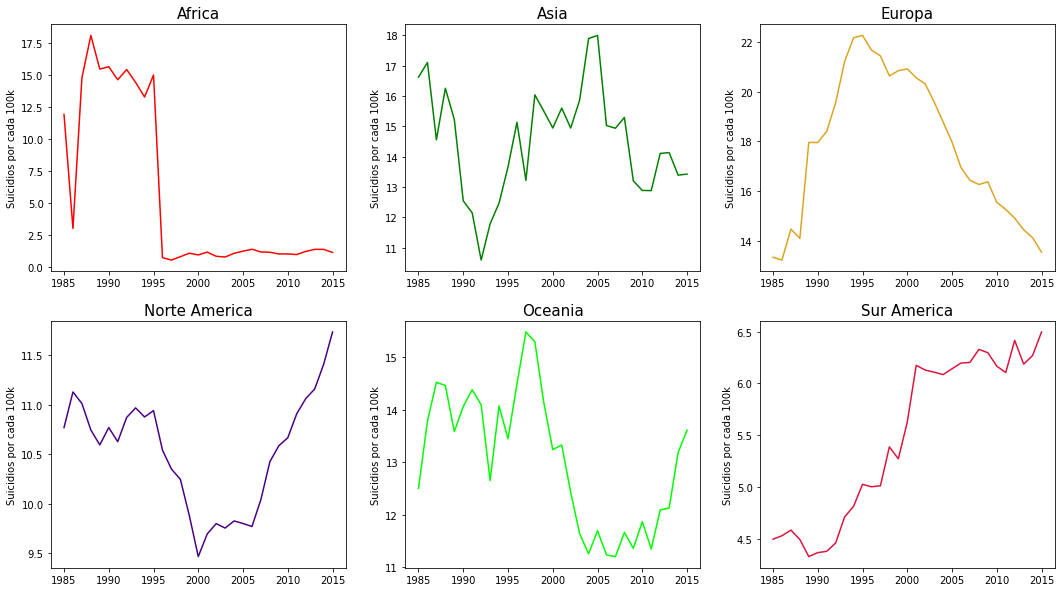

In [42]:
fonts = {'fontsize':15}
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.lineplot(ax=axes[0,0],x=years, y=AF,color="r")
axes[0,0].set_title("Africa",fontdict=fonts)
axes[0,0].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[0,1], x=years, y=AS,color="g")
axes[0,1].set_title("Asia",fontdict=fonts)
axes[0,1].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[0,2], x=years, y=EU,color="goldenrod")
axes[0,2].set_title("Europa",fontdict=fonts)
axes[0,2].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,0], x=years, y=NA,color="indigo")
axes[1,0].set_title("Norte America",fontdict=fonts)
axes[1,0].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,1], x=years, y=OC,color="lime")
axes[1,1].set_title("Oceania",fontdict=fonts)
axes[1,1].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,2], x=years, y=SA,color="crimson")
axes[1,2].set_title("Sur America",fontdict=fonts)
axes[1,2].set_ylabel("Suicidios por cada 100k")


## Insights Importantes
* Europa es el continente con mas suicidios por cada 100k habitantes. A lo largo de los años. Aunque ha sido reducido de manera importante.
* Africa no contiene suficiente informacion para dar un panorama completo.
* Asia y Oceania mantienen una tendencia regular. (teniendo picos altos y bajos). Ocenia va a la alza.
* Norte America y Sur America han ido a la alza. 
* Sur America aunque vaya a la alza tiene la mitad de tendencia que el resto de continentes.

## Por Sexo.

In [43]:
df.head(4)
sexo = df["sex"].unique().tolist()
sexo.sort()

In [44]:
df_sexo = df[["year","sex","suicides_no","population"]]

In [45]:
df_groupT_C2 = df_sexo.groupby("sex")

In [46]:
for names,groups in df_groupT_C2:
    print(names)
    print(groups)

female
       year     sex  suicides_no  population
2      1987  female           14      289700
5      1987  female            1       35600
6      1987  female            6      278800
7      1987  female            4      257200
9      1987  female            0      311000
...     ...     ...          ...         ...
27648  2014  female          162     2735238
27649  2014  female          107     3620833
27650  2014  female            9      348465
27652  2014  female           44     2631600
27653  2014  female           21     1438935

[13827 rows x 4 columns]
male
       year   sex  suicides_no  population
0      1987  male           21      312900
1      1987  male           16      308000
3      1987  male            1       21800
4      1987  male            9      274300
8      1987  male            1      137500
...     ...   ...          ...         ...
27643  2014  male          318     2739150
27645  2014  male          144     1271111
27646  2014  male          347     

In [47]:
population_CS = df_groupT_C2["population"].sum()

In [48]:
suicides_CS = df_groupT_C2["suicides_no"].sum()

In [49]:
suicides_per_100k_CS = (suicides_CS/population_CS)*100000
suicides_per_100k_CS = list(suicides_per_100k_CS)
suicides_per_100k_CS

[5.937291977036794, 20.720751858224894]

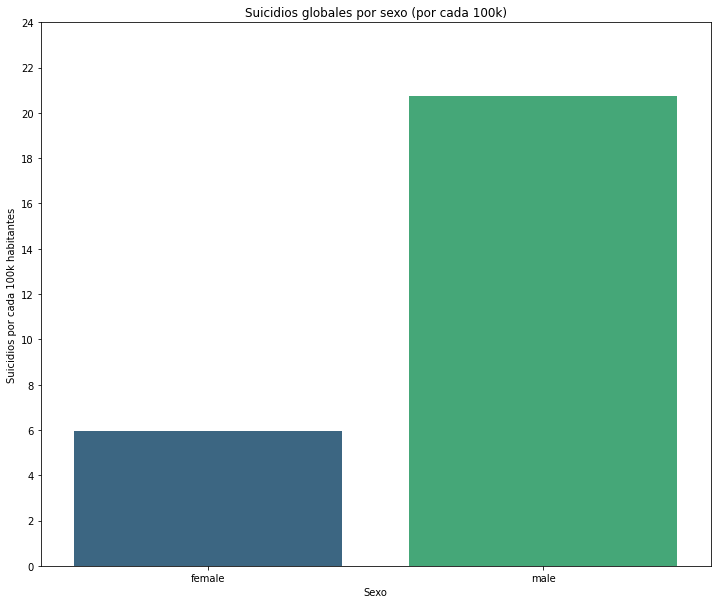

In [50]:
plt.figure(figsize=(12,10))
plt.title("Suicidios globales por sexo (por cada 100k)")
plt.ylim([0,20])
plt.ylabel("Suicidios por cada 100k habitantes")
plt.yticks(np.arange(0,25,step=2))
plt.xlabel("Sexo")
sns.barplot(x = sexo ,y = suicides_per_100k_CS,palette = "viridis")
plt.show()

## Tendencia a lo largo de los años por sexo.

In [51]:
df_groupT_C3 = df.groupby(["year","sex"])

In [52]:
for names,groups in df_groupT_C3:
    print(names)
    print(groups)

(1985, 'female')
                   country  year     sex          age  suicides_no  \
264    Antigua and Barbuda  1985  female  15-24 years            0   
265    Antigua and Barbuda  1985  female  25-34 years            0   
266    Antigua and Barbuda  1985  female  35-54 years            0   
267    Antigua and Barbuda  1985  female   5-14 years            0   
268    Antigua and Barbuda  1985  female  55-74 years            0   
...                    ...   ...     ...          ...          ...   
27060              Uruguay  1985  female    75+ years            4   
27061              Uruguay  1985  female  35-54 years           16   
27062              Uruguay  1985  female  15-24 years            5   
27063              Uruguay  1985  female  25-34 years            3   
27064              Uruguay  1985  female   5-14 years            2   

       population  suicides/100k pop             country-year  \
264          7709               0.00  Antigua and Barbuda1985   
265         

[384 rows x 12 columns]
(1993, 'female')
          country  year     sex          age  suicides_no  population  \
52        Albania  1993  female  15-24 years           10      285300   
54        Albania  1993  female  25-34 years            7      261800   
55        Albania  1993  female  35-54 years            7      331200   
56        Albania  1993  female  55-74 years            2      169500   
57        Albania  1993  female   5-14 years            1      340300   
...           ...   ...     ...          ...          ...         ...   
27432  Uzbekistan  1993  female  55-74 years           60      917800   
27433  Uzbekistan  1993  female  15-24 years          117     2084700   
27434  Uzbekistan  1993  female  25-34 years           83     1763900   
27435  Uzbekistan  1993  female  35-54 years           60     1656100   
27437  Uzbekistan  1993  female   5-14 years            7     2757900   

       suicides/100k pop    country-year  gdp_for_year ($)   \
52                 

          country  year     sex          age  suicides_no  population  \
168       Albania  2003  female    75+ years            6       49088   
172       Albania  2003  female  15-24 years           14      283709   
173       Albania  2003  female  55-74 years            9      195699   
175       Albania  2003  female  25-34 years            9      222941   
176       Albania  2003  female  35-54 years           13      381760   
...           ...   ...     ...          ...          ...         ...   
27552  Uzbekistan  2003  female  25-34 years           99     1962726   
27553  Uzbekistan  2003  female    75+ years           10      237495   
27554  Uzbekistan  2003  female  55-74 years           31      877339   
27555  Uzbekistan  2003  female  35-54 years           77     2675118   
27557  Uzbekistan  2003  female   5-14 years           11     3085543   

       suicides/100k pop    country-year  gdp_for_year ($)   \
168                12.22     Albania2003      5,746,945,913 

[504 rows x 12 columns]
(2012, 'female')
                   country  year     sex          age  suicides_no  \
540    Antigua and Barbuda  2012  female  15-24 years            0   
541    Antigua and Barbuda  2012  female  25-34 years            0   
542    Antigua and Barbuda  2012  female  35-54 years            0   
543    Antigua and Barbuda  2012  female   5-14 years            0   
544    Antigua and Barbuda  2012  female  55-74 years            0   
...                    ...   ...     ...          ...          ...   
27624           Uzbekistan  2012  female  25-34 years          148   
27625           Uzbekistan  2012  female  35-54 years           89   
27627           Uzbekistan  2012  female  55-74 years           25   
27628           Uzbekistan  2012  female    75+ years            4   
27629           Uzbekistan  2012  female   5-14 years           16   

       population  suicides/100k pop             country-year  \
540          8435               0.00  Antigua and Bar

In [53]:
population_CSY = df_groupT_C3["population"].sum()

In [54]:
suicides_CSY = df_groupT_C3["suicides_no"].sum()
suicides_CSY

year  sex   
1985  female     32479
      male       83584
1986  female     33852
      male       86818
1987  female     35006
                 ...  
2014  male      171178
2015  female     47248
      male      156392
2016  female      3452
      male       11728
Name: suicides_no, Length: 64, dtype: int64

In [55]:
suicides_per_100k_CSY = (suicides_CSY/population_CSY)*100000
suicides_per_100k_CSY = list(suicides_per_100k_CSY)
len(suicides_per_100k_CSY)

64

In [56]:
male = suicides_per_100k_CSY[1::2]
female = suicides_per_100k_CSY[0::2]

In [57]:
male = list(male[:-1])
female = list(female[:-1])

Text(0, 0.5, 'Suicidios por cada 100k')

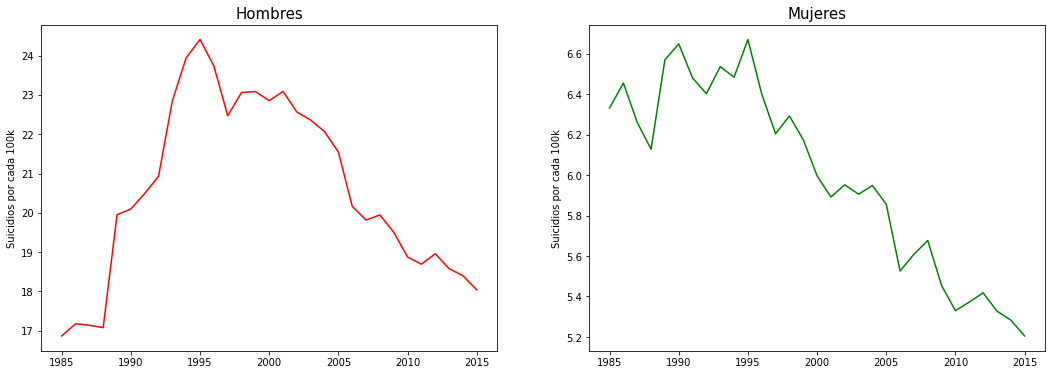

In [58]:
fonts = {'fontsize':15}
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot(ax=axes[0],x=years, y=male,color="r")
axes[0].set_title("Hombres",fontdict=fonts)
axes[0].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1], x=years, y=female,color="g")
axes[1].set_title("Mujeres",fontdict=fonts)
axes[1].set_ylabel("Suicidios por cada 100k")

### Insights
* En proporcion los hombres cometen mas suicidios que las mujeres casi 3.5 mas.
* El pico mas alto fue en ambos casos 1995.
* En ambos sexos ha ido disminuyendo la tendencia de forma consistente.
* A pesar que ha bajado el de hombres sigue siendo casi 3 veces superior al de mujeres.

## Por edad.

In [59]:
df.head(3)
age = df["age"].unique().tolist()
age1 = ["15-24 years","25-34 years","35-54 years","5-14 years","55-74 years","75+ years"]

In [60]:
df_edad = df[["year","age","suicides_no","population"]]
df_edad.head(2)

year          age  suicides_no  population
0  1987  15-24 years           21      312900
1  1987  35-54 years           16      308000

In [61]:
df_groupT_C4 = df_edad.groupby(["age"])

In [62]:
for names,groups in df_groupT_C4:
    print(names)
    print(groups)

15-24 years
       year          age  suicides_no  population
0      1987  15-24 years           21      312900
2      1987  15-24 years           14      289700
13     1988  15-24 years           17      319200
17     1988  15-24 years            8      295600
28     1989  15-24 years           12      323500
...     ...          ...          ...         ...
27622  2012  15-24 years          311     3199204
27632  2013  15-24 years          323     3039740
27633  2013  15-24 years          320     3171202
27644  2014  15-24 years          347     2992817
27646  2014  15-24 years          347     3126905

[4614 rows x 4 columns]
25-34 years
       year          age  suicides_no  population
4      1987  25-34 years            9      274300
7      1987  25-34 years            4      257200
19     1988  25-34 years            5      262400
20     1988  25-34 years            5      279900
25     1989  25-34 years           18      283600
...     ...          ...          ...         ...
2

In [63]:
population_CA = df_groupT_C4["population"].sum()
population_CA

age
15-24 years     8639271272
25-34 years     8433721025
35-54 years    14370499935
5-14 years      8396058896
55-74 years     8800717153
75+ years       2662693294
Name: population, dtype: int64

In [64]:
suicides_CA = df_groupT_C4["suicides_no"].sum()

In [65]:
suicides_per_100k_CA = (suicides_CA/population_CA)*100000
suicides_per_100k_CA = list(suicides_per_100k_CA)

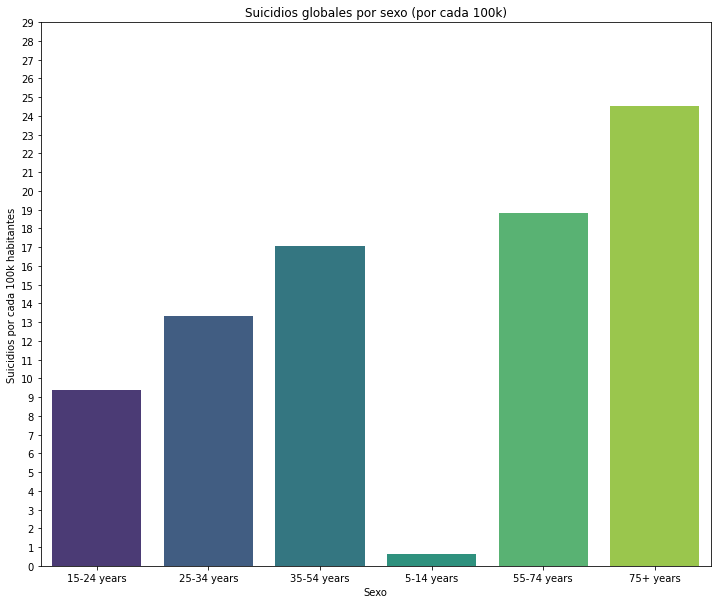

In [66]:
plt.figure(figsize=(12,10))
plt.title("Suicidios globales por sexo (por cada 100k)")
plt.ylim([0,20])
plt.ylabel("Suicidios por cada 100k habitantes")
plt.yticks(np.arange(0,30,step=1))
plt.xlabel("Sexo")
sns.barplot(x = age1 ,y = suicides_per_100k_CA,palette = "viridis")
plt.show()

## Tendencia de suicidios por edad a lo largo de los años

In [67]:
df_groupT_C5 = df.groupby(["year","age"])

In [68]:
for names,groups in df_groupT_C5:
    print(names)
    print(groups)

(1985, '15-24 years')
                   country  year     sex          age  suicides_no  \
264    Antigua and Barbuda  1985  female  15-24 years            0   
270    Antigua and Barbuda  1985    male  15-24 years            0   
594              Argentina  1985    male  15-24 years          156   
597              Argentina  1985  female  15-24 years           69   
1429             Australia  1985    male  15-24 years          315   
...                    ...   ...     ...          ...          ...   
26319       United Kingdom  1985  female  15-24 years           86   
26686        United States  1985    male  15-24 years         4267   
26691        United States  1985  female  15-24 years          854   
27059              Uruguay  1985    male  15-24 years           16   
27062              Uruguay  1985  female  15-24 years            5   

       population  suicides/100k pop             country-year  \
264          7709               0.00  Antigua and Barbuda1985   
270    

                   country  year     sex        age  suicides_no  population  \
12                 Albania  1988  female  75+ years            2       36400   
14                 Albania  1988    male  75+ years            1       22300   
305    Antigua and Barbuda  1988  female  75+ years            0        1141   
311    Antigua and Barbuda  1988    male  75+ years            0         603   
624              Argentina  1988    male  75+ years          216      392000   
...                    ...   ...     ...        ...          ...         ...   
26351       United Kingdom  1988  female  75+ years          205     2551912   
26718        United States  1988    male  75+ years         2548     4409000   
26725        United States  1988  female  75+ years          519     8062000   
27090              Uruguay  1988    male  75+ years           33       48100   
27095              Uruguay  1988  female  75+ years            7       74600   

       suicides/100k pop             co

[130 rows x 12 columns]
(1993, '5-14 years')
                   country  year     sex         age  suicides_no  population  \
57                 Albania  1993  female  5-14 years            1      340300   
58                 Albania  1993    male  5-14 years            1      367000   
364    Antigua and Barbuda  1993  female  5-14 years            0        7529   
369    Antigua and Barbuda  1993    male  5-14 years            0        7298   
694              Argentina  1993    male  5-14 years           25     3367500   
...                    ...   ...     ...         ...          ...         ...   
26789        United States  1993  female  5-14 years           88    18078200   
27136              Uruguay  1993    male  5-14 years            4      267997   
27137              Uruguay  1993  female  5-14 years            2      257605   
27436           Uzbekistan  1993    male  5-14 years           47     2817200   
27437           Uzbekistan  1993  female  5-14 years            

             country  year     sex          age  suicides_no  population  \
92           Albania  1996    male  55-74 years            3      179900   
93           Albania  1996  female  55-74 years            1      183100   
721        Argentina  1996    male  55-74 years          464     2235900   
726        Argentina  1996  female  55-74 years          131     2653800   
1033         Armenia  1996    male  55-74 years           18      246200   
...              ...   ...     ...          ...          ...         ...   
26820  United States  1996  female  55-74 years         1118    21540200   
27163        Uruguay  1996    male  55-74 years           98      246654   
27168        Uruguay  1996  female  55-74 years           25      300610   
27463     Uzbekistan  1996    male  55-74 years          195      819300   
27468     Uzbekistan  1996  female  55-74 years           55      959900   

       suicides/100k pop       country-year  gdp_for_year ($)   \
92                  1

[164 rows x 12 columns]
(1999, '75+ years')
                   country  year     sex        age  suicides_no  population  \
120                Albania  1999    male  75+ years            3       25900   
122                Albania  1999  female  75+ years            4       42400   
413    Antigua and Barbuda  1999  female  75+ years            0        1451   
419    Antigua and Barbuda  1999    male  75+ years            0         947   
756              Argentina  1999    male  75+ years          204      515800   
...                    ...   ...     ...        ...          ...         ...   
26858        United States  1999  female  75+ years          469    10210401   
27198              Uruguay  1999    male  75+ years           66       62922   
27205              Uruguay  1999  female  75+ years            8      113267   
27502           Uzbekistan  1999    male  75+ years           13       98024   
27504           Uzbekistan  1999  female  75+ years           13      209948

                   country  year     sex          age  suicides_no  \
157                Albania  2002    male  25-34 years           23   
163                Albania  2002  female  25-34 years            7   
445    Antigua and Barbuda  2002  female  25-34 years            0   
451    Antigua and Barbuda  2002    male  25-34 years            0   
795              Argentina  2002    male  25-34 years          412   
...                    ...   ...     ...          ...          ...   
26893        United States  2002  female  25-34 years          911   
27237              Uruguay  2002    male  25-34 years           82   
27243              Uruguay  2002  female  25-34 years           14   
27535           Uzbekistan  2002    male  25-34 years          288   
27540           Uzbekistan  2002  female  25-34 years          107   

       population  suicides/100k pop             country-year  \
157        206286              11.15              Albania2002   
163        223685            

                   country  year     sex          age  suicides_no  \
187                Albania  2004    male  55-74 years           10   
189                Albania  2004  female  55-74 years            3   
468    Antigua and Barbuda  2004    male  55-74 years            1   
474    Antigua and Barbuda  2004  female  55-74 years            0   
817              Argentina  2004    male  55-74 years          500   
...                    ...   ...     ...          ...          ...   
26916        United States  2004  female  55-74 years         1301   
27259              Uruguay  2004    male  55-74 years          101   
27264              Uruguay  2004  female  55-74 years           31   
27560           Uzbekistan  2004    male  55-74 years           84   
27567           Uzbekistan  2004  female  55-74 years           18   

       population  suicides/100k pop             country-year  \
187        207202               4.83              Albania2004   
189        203841            

                   country  year     sex        age  suicides_no  population  \
209                Albania  2006  female  75+ years            0       56011   
215                Albania  2006    male  75+ years            0       40782   
497    Antigua and Barbuda  2006  female  75+ years            0        1573   
503    Antigua and Barbuda  2006    male  75+ years            0        1107   
840              Argentina  2006    male  75+ years          246      620010   
...                    ...   ...     ...        ...          ...         ...   
26570       United Kingdom  2006  female  75+ years           86     2866699   
26934        United States  2006    male  75+ years         2494     6986609   
26942        United States  2006  female  75+ years          421    11356899   
27282              Uruguay  2006    male  75+ years           59       73133   
27289              Uruguay  2006  female  75+ years           13      136305   

       suicides/100k pop             co

                   country  year     sex          age  suicides_no  \
241                Albania  2009  female  25-34 years            0   
247                Albania  2009    male  25-34 years            0   
529    Antigua and Barbuda  2009  female  25-34 years            0   
535    Antigua and Barbuda  2009    male  25-34 years            0   
879              Argentina  2009    male  25-34 years          504   
...                    ...   ...     ...          ...          ...   
26977        United States  2009  female  25-34 years         1027   
27320              Uruguay  2009    male  25-34 years           79   
27327              Uruguay  2009  female  25-34 years           12   
27583           Uzbekistan  2009    male  25-34 years          252   
27587           Uzbekistan  2009  female  25-34 years           85   

       population  suicides/100k pop             country-year  \
241        182712               0.00              Albania2009   
247        174955            

              country  year     sex         age  suicides_no  population  \
910         Argentina  2011  female  5-14 years           29     3472180   
911         Argentina  2011    male  5-14 years           28     3592374   
1198          Armenia  2011  female  5-14 years            0      164004   
1199          Armenia  2011    male  5-14 years            0      189377   
1421            Aruba  2011  female  5-14 years            0        7064   
...               ...   ...     ...         ...          ...         ...   
26633  United Kingdom  2011  female  5-14 years            4     3429167   
27004   United States  2011    male  5-14 years          201    21185153   
27005   United States  2011  female  5-14 years           86    20251453   
27614      Uzbekistan  2011    male  5-14 years           45     2710780   
27617      Uzbekistan  2011  female  5-14 years           28     2588474   

       suicides/100k pop        country-year   gdp_for_year ($)   \
910                

                   country  year     sex          age  suicides_no  \
556    Antigua and Barbuda  2013  female  55-74 years            0   
562    Antigua and Barbuda  2013    male  55-74 years            0   
927              Argentina  2013    male  55-74 years          398   
932              Argentina  2013  female  55-74 years          102   
1214               Armenia  2013    male  55-74 years           11   
...                    ...   ...     ...          ...          ...   
27024        United States  2013  female  55-74 years         2484   
27355              Uruguay  2013    male  55-74 years           89   
27361              Uruguay  2013  female  55-74 years           25   
27634           Uzbekistan  2013    male  55-74 years          119   
27640           Uzbekistan  2013  female  55-74 years           21   

       population  suicides/100k pop             country-year  \
556          5787               0.00  Antigua and Barbuda2013   
562          5238            

25144                6713  Millenials        AS  
(2016, '35-54 years')
              country  year     sex          age  suicides_no  population  \
1250          Armenia  2016    male  35-54 years           16      350633   
1255          Armenia  2016  female  35-54 years            3      408109   
2160          Austria  2016    male  35-54 years          260     1281202   
2165          Austria  2016  female  35-54 years           95     1273241   
6586          Croatia  2016    male  35-54 years          146      571003   
6591          Croatia  2016  female  35-54 years           47      570380   
7050           Cyprus  2016    male  35-54 years           15      106925   
7055           Cyprus  2016  female  35-54 years            3      117819   
7374   Czech Republic  2016    male  35-54 years          386     1617906   
7378   Czech Republic  2016  female  35-54 years           91     1541109   
10648         Grenada  2016  female  35-54 years            0       11222   
1065

In [69]:
population_CAY = df_groupT_C5["population"].sum()

In [70]:
suicides_CAY = df_groupT_C5["suicides_no"].sum()

In [71]:
suicides_per_100k_CAY = (suicides_CAY/population_CAY)*100000
suicides_per_100k_CAY.head(8)

year  age        
1985  15-24 years     9.073091
      25-34 years    11.969983
      35-54 years    14.529562
      5-14 years      0.494039
      55-74 years    18.810908
      75+ years      29.826435
1986  15-24 years     9.066016
      25-34 years    12.306005
dtype: float64

In [72]:
G1 = suicides_per_100k_CAY[0::6]
G1 = list(G1[:-1])
len(G1)

31

In [73]:
G2 = suicides_per_100k_CAY[1::6]
G2 = list(G2[:-1])
len(G2)

31

In [74]:
G3 = suicides_per_100k_CAY[2::6]
G3 = list(G3[:-1])
len(G3)

31

In [75]:
G4 = suicides_per_100k_CAY[3::6]
G4 = list(G4[:-1])
len(G4)

31

In [76]:
G5 = suicides_per_100k_CAY[4::6]
G5 = list(G5[:-1])
len(G5)

31

In [77]:
G6 = suicides_per_100k_CAY[5::6]
G6 = list(G6)
len(G6)

31

Text(0, 0.5, 'Suicidios por cada 100k')

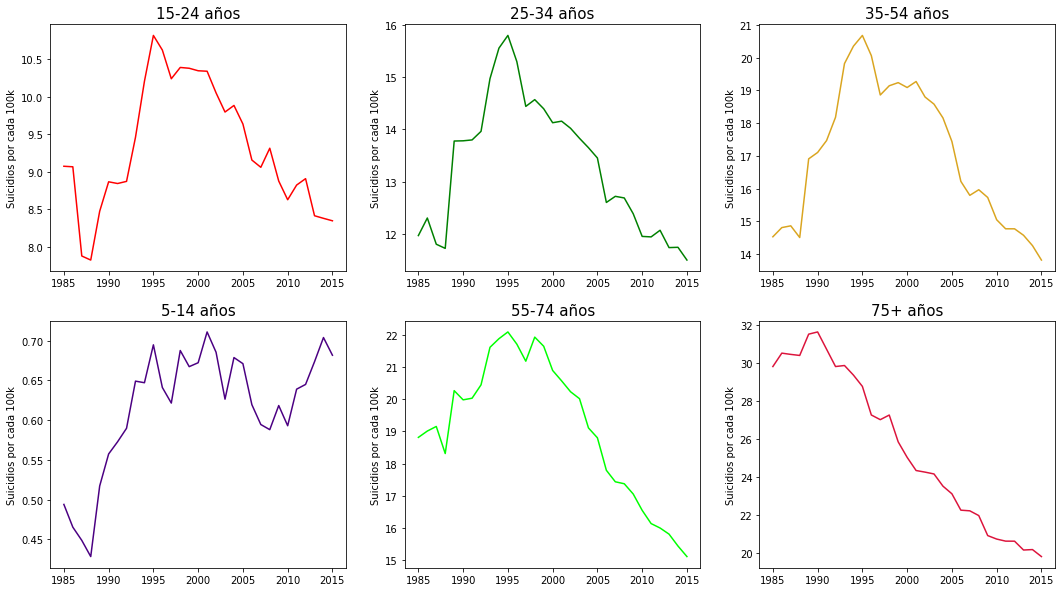

In [78]:
fonts = {'fontsize':15}
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.lineplot(ax=axes[0,0],x=years, y=G1,color="r")
axes[0,0].set_title("15-24 años",fontdict=fonts)
axes[0,0].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[0,1], x=years, y=G2,color="g")
axes[0,1].set_title("25-34 años",fontdict=fonts)
axes[0,1].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[0,2], x=years, y=G3,color="goldenrod")
axes[0,2].set_title("35-54 años",fontdict=fonts)
axes[0,2].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,0], x=years, y=G4,color="indigo")
axes[1,0].set_title("5-14 años",fontdict=fonts)
axes[1,0].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,1], x=years, y=G5,color="lime")
axes[1,1].set_title("55-74 años",fontdict=fonts)
axes[1,1].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,2], x=years, y=G6,color="crimson")
axes[1,2].set_title("75+ años",fontdict=fonts)
axes[1,2].set_ylabel("Suicidios por cada 100k")


## Insights
* A excepcion del grupo 5-14 años los otros grupos han disminuido de forma considerable.
* A pesar de que el grupo de +75 ha ido en reduccion sigue siendo mayor que el resto de grupos de edad.
* Conforme mas avanzan las edades aumenta su proporcion de suicidios.
* A pesar de ser el mas bajo el grupo 5-14 ha ido en aumento en los años mas recientes.

# Por pais

In [79]:
countries = df["country"].unique().tolist()
df.head(2)
countries

['Albania',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Macau',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Montenegro',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway',
 'Panama',
 'Paraguay',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Republic of Korea',
 'Romania',
 'Russian Federation',
 'Saint Lucia',
 'Saint Vincent and Grenadines',
 'Serbia',
 'Seychelles',
 'Singapor

In [80]:
df_paises = df[["country","year","suicides_no","population"]]
df_paises.head(2)

country  year  suicides_no  population
0  Albania  1987           21      312900
1  Albania  1987           16      308000

In [81]:
df_groupT_C6 = df_paises.groupby("country")

In [82]:
for names,groups in df_groupT_C6:
    print(names)
    print(groups)

Albania
     country  year  suicides_no  population
0    Albania  1987           21      312900
1    Albania  1987           16      308000
2    Albania  1987           14      289700
3    Albania  1987            1       21800
4    Albania  1987            9      274300
..       ...   ...          ...         ...
259  Albania  2010           12      394593
260  Albania  2010            7      241491
261  Albania  2010            6      263581
262  Albania  2010            2      223969
263  Albania  2010            0      240939

[264 rows x 4 columns]
Antigua and Barbuda
                 country  year  suicides_no  population
264  Antigua and Barbuda  1985            0        7709
265  Antigua and Barbuda  1985            0        6344
266  Antigua and Barbuda  1985            0        6173
267  Antigua and Barbuda  1985            0        7339
268  Antigua and Barbuda  1985            0        3778
..                   ...   ...          ...         ...
583  Antigua and Barbuda  20

      country  year  suicides_no  population
7382  Denmark  1994           89      131700
7383  Denmark  1994          189      448200
7384  Denmark  1994          279      755600
7385  Denmark  1994           70      230600
7386  Denmark  1994           85      414100
...       ...   ...          ...         ...
7641  Denmark  2015           18      374051
7642  Denmark  2015           15      331400
7643  Denmark  2015            6      356882
7644  Denmark  2015            3      323821
7645  Denmark  2015            0      340483

[264 rows x 4 columns]
Ecuador
      country  year  suicides_no  population
7646  Ecuador  1985            8       40000
7647  Ecuador  1985           70      610800
7648  Ecuador  1985           33      289000
7649  Ecuador  1985          104      915700
7650  Ecuador  1985           57      692800
...       ...   ...          ...         ...
8013  Ecuador  2015           46     1876229
8014  Ecuador  2015           22      932718
8015  Ecuador  2015    

        country  year  suicides_no  population
19262  Portugal  1985           89      160554
19263  Portugal  1985          245      805542
19264  Portugal  1985          185     1103803
19265  Portugal  1985           39      288221
19266  Portugal  1985           87      703271
...         ...   ...          ...         ...
19581  Portugal  2014           28      562495
19582  Portugal  2014           21      638072
19583  Portugal  2014            8      545684
19584  Portugal  2014            2      511478
19585  Portugal  2014            0      537929

[324 rows x 4 columns]
Puerto Rico
           country  year  suicides_no  population
19586  Puerto Rico  1985           25       46600
19587  Puerto Rico  1985           66      200900
19588  Puerto Rico  1985           70      322500
19589  Puerto Rico  1985           43      235800
19590  Puerto Rico  1985           28      321500
...            ...   ...          ...         ...
19953  Puerto Rico  2015            7      514290


In [83]:
population_CP = df_groupT_C6["population"].sum()

In [84]:
suicides_CP = df_groupT_C6["suicides_no"].sum()

In [85]:
suicides_per_100k_CP = (suicides_CP/population_CP)*100000
suicides_per_100k_CP

country
Albania                  3.160827
Antigua and Barbuda      0.552700
Argentina                7.936309
Armenia                  2.462889
Aruba                    8.017928
                          ...    
United Arab Emirates     1.704003
United Kingdom           7.867928
United States           12.838459
Uruguay                 15.627650
Uzbekistan               7.154891
Length: 94, dtype: float64

In [86]:
suicides_per_100k_CP = list(suicides_per_100k_CP)

In [87]:
#Ordenando de mayor a menor para mejor vista del grafico.
size= len(suicides_per_100k_CP)
indice = [i for i in range(0,size)]
zipped = list(zip(indice,suicides_per_100k_CP))
sorted_list = sorted(zipped,key=lambda x: x[1] )

In [88]:
unziped = list(zip(*sorted_list))
index = str(unziped[0])
index

'(42, 1, 52, 78, 8, 7, 34, 46, 89, 63, 86, 3, 67, 35, 9, 10, 0, 31, 22, 28, 62, 33, 55, 14, 18, 61, 72, 53, 13, 71, 25, 59, 40, 19, 84, 74, 45, 93, 87, 41, 51, 90, 2, 4, 56, 79, 66, 65, 26, 17, 57, 75, 47, 39, 54, 76, 69, 91, 5, 85, 16, 38, 60, 24, 58, 32, 82, 50, 92, 15, 64, 21, 23, 83, 81, 73, 68, 30, 20, 6, 36, 12, 43, 29, 88, 27, 77, 44, 48, 37, 11, 80, 70, 49)'

In [89]:
index1 = index.replace("("," ")
index1 = index1.replace(")"," ")
index1 = index1.split(",")
index1 = [int(i) for i in index1]
len(index1)

94

In [90]:
countries1=[]
for i in index1:
    countries1.append(countries[i])

len(countries1)

94

In [91]:
suicides_per_100k_CP1 = []
for i in index1:
    suicides_per_100k_CP1.append(suicides_per_100k_CP[i])
len(suicides_per_100k_CP1)

94

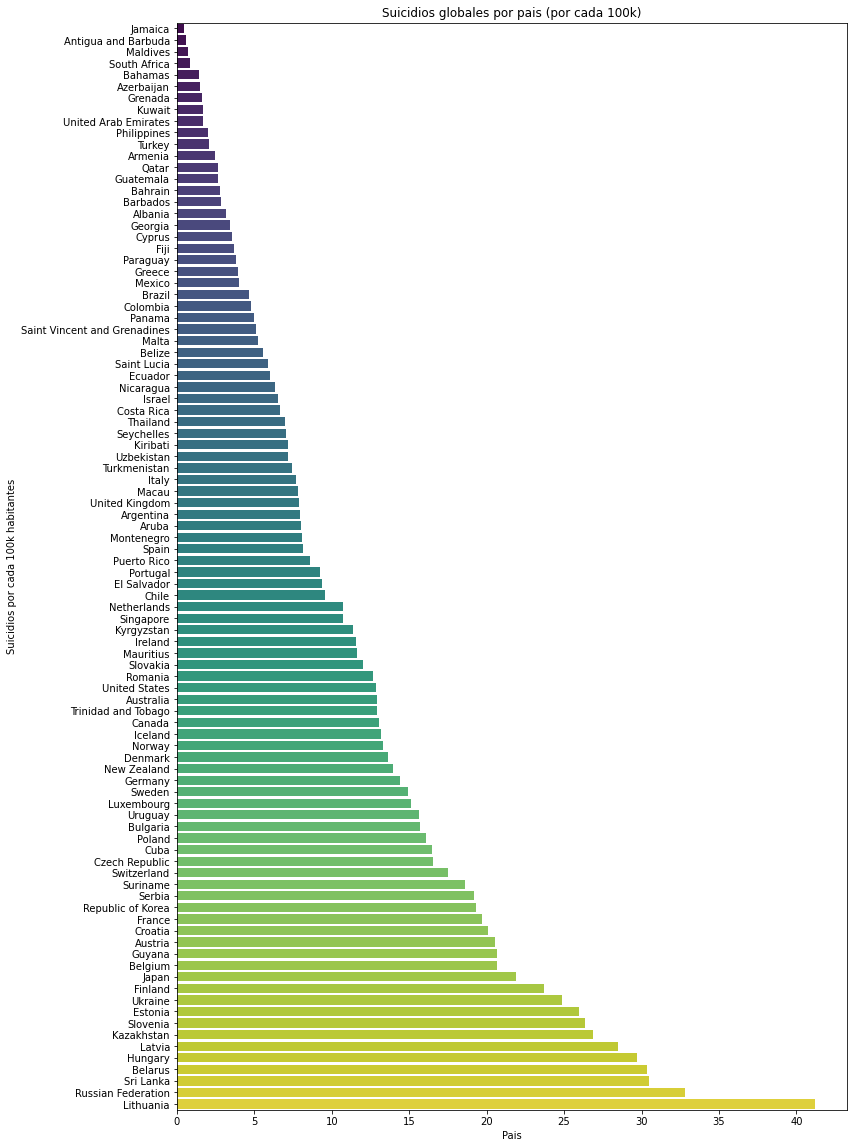

In [92]:
plt.figure(figsize=(12,20))
plt.title("Suicidios globales por pais (por cada 100k)")
plt.ylim([0,20])
plt.ylabel("Suicidios por cada 100k habitantes")
plt.yticks(np.arange(0,30,step=1))
plt.xlabel("Pais")
sns.barplot(x = suicides_per_100k_CP1 ,y = countries1,palette = "viridis")
plt.show()

## Mapa global.

In [93]:
#Utilizare Folium para eso
import folium

In [94]:
mapa = pd.read_csv("PaisesLocs.csv")
mapa["3"] = mapa["3"].fillna("NA")

In [95]:
mapa

Unnamed: 0                     0          1   3   2   latitude   longitude
0            0               Albania   3.160827  EU  AL  41.000028   19.999962
1            1   Antigua and Barbuda   0.552700  NA  AG  17.223472  -61.955461
2            2             Argentina   7.936309  SA  AR -34.996496  -64.967282
3            3               Armenia   2.462889  AS  AM  40.769627   44.673665
4            4                 Aruba   8.017928  NA  AW  12.490300  -69.960984
..         ...                   ...        ...  ..  ..        ...         ...
89          89  United Arab Emirates   1.704003  AS  AE  24.000249   53.999483
90          90        United Kingdom   7.867928  EU  GB  54.702354   -3.276575
91          91         United States  12.838459  NA  US  39.783730 -100.445882
92          92               Uruguay  15.627650  SA  UY -32.875555  -56.020153
93          93            Uzbekistan   7.154891  AS  UZ  41.323730   63.952810

[94 rows x 7 columns]

In [96]:
mapa["suicides_per_100k"] = suicides_per_100k_CP

In [97]:
world_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
world_geo

'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'

In [98]:
world_map = folium.Map(location=[0,0],zoom_start=2)

In [101]:
threshold_scale = np.linspace(mapa['suicides_per_100k'].min(),
                              mapa['suicides_per_100k'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() 
threshold_scale[-1] = threshold_scale[-1] + 1 

world_map.choropleth(
    geo_data= world_geo,
    data=mapa,
    columns=['0','suicides_per_100k'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Suicidios a nivel global',
    reset=True
)
world_map

/Users/antonioreyesguerrero/Desktop/PythonCurso/Datos/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [104]:
#mapa.at[91,'0']="United States of America"
#mapa

[3.160826697054673,
 0.5527004946166972,
 7.936308517450571,
 2.4628894595868474,
 8.017928405456319,
 12.926598730575591,
 20.534084345060638,
 1.4813449825253175,
 1.4183211713563788,
 2.763531365722876,
 2.848548471431875,
 30.34468485576486,
 20.69253466820519,
 5.533457942141973,
 4.666569903566446,
 15.68854298059328,
 13.021090218461417,
 9.563283531547302,
 4.7908646507573485,
 6.647302320758018,
 20.09040606418262,
 16.44941344861993,
 3.5494408682966183,
 16.541430590851707,
 13.63585079378756,
 6.000093108898873,
 9.370110276966601,
 25.96452450111311,
 3.713026530673813,
 23.72861995115781,
 19.699276694538614,
 3.4444886045547594,
 14.384192207852024,
 3.9127340718102177,
 1.6188909233898212,
 2.668672296103538,
 20.64528383318201,
 29.717557601652377,
 13.178076248254023,
 11.533273604416566,
 6.525615832893574,
 7.700095320719594,
 0.46603731535455933,
 21.920580115486988,
 26.898614418851988,
 7.146651995803702,
 1.6914728633033755,
 11.36539387944627,
 28.4710108479679

In [122]:
df.shape[0]

27654

In [108]:
#countries y suicides_per_100k
df_changes = df[["country","year","suicides_no","population"]]
df_changes

country  year  suicides_no  population
0         Albania  1987           21      312900
1         Albania  1987           16      308000
2         Albania  1987           14      289700
3         Albania  1987            1       21800
4         Albania  1987            9      274300
...           ...   ...          ...         ...
27649  Uzbekistan  2014          107     3620833
27650  Uzbekistan  2014            9      348465
27651  Uzbekistan  2014           60     2762158
27652  Uzbekistan  2014           44     2631600
27653  Uzbekistan  2014           21     1438935

[27654 rows x 4 columns]

In [109]:
'''
Filtrar por año y pais
calcular suicidios por 100k
Aplico por cada pais variacion anual.
Probar con stonia.
y corea del sur
'''
df_groupT_C7 = df_changes.groupby(["country","year"])

In [110]:
for names,groups in df_groupT_C7:
    print(names)
    print(groups)

('Albania', 1987)
    country  year  suicides_no  population
0   Albania  1987           21      312900
1   Albania  1987           16      308000
2   Albania  1987           14      289700
3   Albania  1987            1       21800
4   Albania  1987            9      274300
5   Albania  1987            1       35600
6   Albania  1987            6      278800
7   Albania  1987            4      257200
8   Albania  1987            1      137500
9   Albania  1987            0      311000
10  Albania  1987            0      144600
11  Albania  1987            0      338200
('Albania', 1988)
    country  year  suicides_no  population
12  Albania  1988            2       36400
13  Albania  1988           17      319200
14  Albania  1988            1       22300
15  Albania  1988           14      314100
16  Albania  1988            4      140200
17  Albania  1988            8      295600
18  Albania  1988            3      147500
19  Albania  1988            5      262400
20  Albania  1988 

       country  year  suicides_no  population
612  Argentina  1987          200      369800
613  Argentina  1987          532     2034500
614  Argentina  1987          482     3409100
615  Argentina  1987           57      547000
616  Argentina  1987          224     2347300
617  Argentina  1987          192     2276200
618  Argentina  1987          179     2460600
619  Argentina  1987          209     3418300
620  Argentina  1987           89     2226200
621  Argentina  1987           93     2398400
622  Argentina  1987           15     3101300
623  Argentina  1987           14     3010700
('Argentina', 1988)
       country  year  suicides_no  population
624  Argentina  1988          216      392000
625  Argentina  1988          550     2079000
626  Argentina  1988          477     3503000
627  Argentina  1988           61      602000
628  Argentina  1988          233     2412000
629  Argentina  1988          215     2276000
630  Argentina  1988          211     2524000
631  Argentina

        country  year  suicides_no  population
1486  Australia  1990           87      276900
1487  Australia  1990          418     1415000
1488  Australia  1990          374     1405900
1489  Australia  1990          325     1266400
1490  Australia  1990          549     2220600
1491  Australia  1990           37      465600
1492  Australia  1990          109     1401200
1493  Australia  1990           98     1349000
1494  Australia  1990          136     2154800
1495  Australia  1990           64     1354800
1496  Australia  1990            5     1281300
1497  Australia  1990            0     1215500
('Australia', 1991)
        country  year  suicides_no  population
1498  Australia  1991          114      287600
1499  Australia  1991          427     1416500
1500  Australia  1991          631     2279600
1501  Australia  1991          354     1405900
1502  Australia  1991          273     1282700
1503  Australia  1991           39      480900
1504  Australia  1991          169     2

      country  year  suicides_no  population
2122  Austria  2013          221      255540
2123  Austria  2013          299      893602
2124  Austria  2013          317     1282009
2125  Austria  2013           64      431074
2126  Austria  2013           75      563630
2127  Austria  2013          118      981829
2128  Austria  2013           54      518852
2129  Austria  2013           94     1279480
2130  Austria  2013           25      556475
2131  Austria  2013           20      496526
2132  Austria  2013            3      400256
2133  Austria  2013            1      420342
('Austria', 2014)
      country  year  suicides_no  population
2134  Austria  2014          206      269625
2135  Austria  2014          282      906857
2136  Austria  2014          321     1280204
2137  Austria  2014           77      442472
2138  Austria  2014          100      576126
2139  Austria  2014           79      516580
2140  Austria  2014          108      993973
2141  Austria  2014           93     

2743  Bahrain  2002            0        2755
('Bahrain', 2003)
      country  year  suicides_no  population
2744  Bahrain  2003           17      137287
2745  Bahrain  2003            9      105799
2746  Bahrain  2003            5       63380
2747  Bahrain  2003            3       83143
2748  Bahrain  2003            0       60298
2749  Bahrain  2003            0       75430
2750  Bahrain  2003            0       65298
2751  Bahrain  2003            0       16343
2752  Bahrain  2003            0        2946
2753  Bahrain  2003            0       70584
2754  Bahrain  2003            0       19574
2755  Bahrain  2003            0        2831
('Bahrain', 2004)
      country  year  suicides_no  population
2756  Bahrain  2004            4       20717
2757  Bahrain  2004           19      116777
2758  Bahrain  2004           10      150835
2759  Bahrain  2004            3       68052
2760  Bahrain  2004            3       80288
2761  Bahrain  2004            2       88431
2762  Bahrain  2004

3463  Belgium  1986            1      602600
('Belgium', 1987)
      country  year  suicides_no  population
3464  Belgium  1987          222      214800
3465  Belgium  1987          433      893500
3466  Belgium  1987          483     1239800
3467  Belgium  1987          273      789200
3468  Belgium  1987          113      422000
3469  Belgium  1987          232     1040900
3470  Belgium  1987          215     1222000
3471  Belgium  1987          121      756300
3472  Belgium  1987          100      759300
3473  Belgium  1987           35      725700
3474  Belgium  1987           11      628100
3475  Belgium  1987            0      599700
('Belgium', 1988)
      country  year  suicides_no  population
3476  Belgium  1988          181      217000
3477  Belgium  1988          390      901500
3478  Belgium  1988          423     1251300
3479  Belgium  1988          238      796900
3480  Belgium  1988          104      429200
3481  Belgium  1988          211     1044800
3482  Belgium  1988

     country  year  suicides_no  population
4100  Belize  2012            3       12340
4101  Belize  2012            6       25854
4102  Belize  2012            6       34785
4103  Belize  2012            2       34680
4104  Belize  2012            1       34413
4105  Belize  2012            0       27291
4106  Belize  2012            0       35365
4107  Belize  2012            0       38680
4108  Belize  2012            0       11573
4109  Belize  2012            0        2440
4110  Belize  2012            0       39194
4111  Belize  2012            0        2331
('Belize', 2013)
     country  year  suicides_no  population
4112  Belize  2013            7       35782
4113  Belize  2013            4       26847
4114  Belize  2013            4       35340
4115  Belize  2013            1       12803
4116  Belize  2013            1       35551
4117  Belize  2013            0       28278
4118  Belize  2013            0       36553
4119  Belize  2013            0       38558
4120  Belize  2

     country  year  suicides_no  population
4964  Canada  1992          739     2561600
4965  Canada  1992          136      499900
4966  Canada  1992         1020     3889500
4967  Canada  1992          504     2042300
4968  Canada  1992          497     2087600
4969  Canada  1992          323     3857500
4970  Canada  1992          146     2313800
4971  Canada  1992          155     2499900
4972  Canada  1992          119     1969200
4973  Canada  1992           35      834600
4974  Canada  1992           26     1995400
4975  Canada  1992            8     1903100
('Canada', 1993)
     country  year  suicides_no  population
4976  Canada  1993         1141     4049700
4977  Canada  1993          721     2568700
4978  Canada  1993          138      513400
4979  Canada  1993          488     2054700
4980  Canada  1993          499     2127800
4981  Canada  1993          331     4013200
4982  Canada  1993           55      858000
4983  Canada  1993          146     2348500
4984  Canada  1

5779  Colombia  1999            3      396321
('Colombia', 2000)
       country  year  suicides_no  population
5780  Colombia  2000           60      290481
5781  Colombia  2000          629     3998961
5782  Colombia  2000          198     1491171
5783  Colombia  2000          438     3310535
5784  Colombia  2000          453     4391802
5785  Colombia  2000          262     3921422
5786  Colombia  2000           96     3400584
5787  Colombia  2000           99     4710061
5788  Colombia  2000            6      409711
5789  Colombia  2000           57     4209864
5790  Colombia  2000           23     1738797
5791  Colombia  2000           37     4378953
('Colombia', 2001)
       country  year  suicides_no  population
5792  Colombia  2001           54      304065
5793  Colombia  2001          234     1547265
5794  Colombia  2001          602     4057598
5795  Colombia  2001          439     3328209
5796  Colombia  2001          491     4555809
5797  Colombia  2001          302     3976

('Croatia', 2008)
      country  year  suicides_no  population
6488  Croatia  2008          115      105525
6489  Croatia  2008          200      450580
6490  Croatia  2008          202      632952
6491  Croatia  2008           48      210591
6492  Croatia  2008           49      314031
6493  Croatia  2008           40      284857
6494  Croatia  2008           72      536698
6495  Croatia  2008           47      638100
6496  Croatia  2008            9      305383
6497  Croatia  2008            7      272369
6498  Croatia  2008            3      242691
6499  Croatia  2008            1      231806
('Croatia', 2009)
      country  year  suicides_no  population
6500  Croatia  2009          107      110100
6501  Croatia  2009          199      455148
6502  Croatia  2009          220      628629
6503  Croatia  2009           53      216621
6504  Croatia  2009           45      278610
6505  Croatia  2009           44      316164
6506  Croatia  2009           63      537865
6507  Croatia  2009

7155  Czech Republic  1997            1      634800
('Czech Republic', 1998)
             country  year  suicides_no  population
7156  Czech Republic  1998          127      173500
7157  Czech Republic  1998          554     1487500
7158  Czech Republic  1998          277      845700
7159  Czech Republic  1998          179      742300
7160  Czech Republic  1998           65      354800
7161  Czech Republic  1998          126      849600
7162  Czech Republic  1998          116     1053700
7163  Czech Republic  1998          110     1490700
7164  Czech Republic  1998           31      813700
7165  Czech Republic  1998           20      710600
7166  Czech Republic  1998            5      659000
7167  Czech Republic  1998            3      627200
('Czech Republic', 1999)
             country  year  suicides_no  population
7168  Czech Republic  1999          154      181079
7169  Czech Republic  1999          302      860656
7170  Czech Republic  1999          509     1488504
7171  Czech Re

7777  Ecuador  1995            6     1369259
('Ecuador', 1996)
      country  year  suicides_no  population
7778  Ecuador  1996           53      434259
7779  Ecuador  1996           11       91455
7780  Ecuador  1996          111      927403
7781  Ecuador  1996          126     1169923
7782  Ecuador  1996          102     1143710
7783  Ecuador  1996           88     1091980
7784  Ecuador  1996           46      920330
7785  Ecuador  1996            9      462818
7786  Ecuador  1996           21     1105412
7787  Ecuador  1996            2      111706
7788  Ecuador  1996           17     1345854
7789  Ecuador  1996            7     1390998
('Ecuador', 1997)
      country  year  suicides_no  population
7790  Ecuador  1997          109      949086
7791  Ecuador  1997          124     1186873
7792  Ecuador  1997            9       95968
7793  Ecuador  1997           99     1128260
7794  Ecuador  1997          101     1160292
7795  Ecuador  1997           35      449276
7796  Ecuador  1997

8497  Estonia  2010            0       64580
('Estonia', 2011)
      country  year  suicides_no  population
8498  Estonia  2011           21       29683
8499  Estonia  2011           57      121737
8500  Estonia  2011           58      178933
8501  Estonia  2011           23       95987
8502  Estonia  2011           19       87167
8503  Estonia  2011           12       77543
8504  Estonia  2011           15      185535
8505  Estonia  2011            9      172988
8506  Estonia  2011            3       82075
8507  Estonia  2011            1       90940
8508  Estonia  2011            0       61510
8509  Estonia  2011            0       65329
('Estonia', 2012)
      country  year  suicides_no  population
8510  Estonia  2012           20       30891
8511  Estonia  2012           59      122960
8512  Estonia  2012           65      179456
8513  Estonia  2012           30       96938
8514  Estonia  2012           18       80117
8515  Estonia  2012           14       83194
8516  Estonia  2012

     country  year  suicides_no  population
9158  France  1995         1299     1339300
9159  France  1995         2067     5066300
9160  France  1995         3198     7887100
9161  France  1995         1397     4337200
9162  France  1995          543     2517900
9163  France  1995         1002     5819400
9164  France  1995          622     4081100
9165  France  1995         1110     7882500
9166  France  1995          372     4319400
9167  France  1995          181     3944400
9168  France  1995           22     3751400
9169  France  1995            6     3582500
('France', 1996)
     country  year  suicides_no  population
9170  France  1996         1227     1406900
9171  France  1996         3198     8040100
9172  France  1996         1905     5025600
9173  France  1996         1308     4348700
9174  France  1996          524     2604800
9175  France  1996          898     5746100
9176  France  1996         1135     8060200
9177  France  1996          519     4039700
9178  France  1

9949  Germany  2013            6     3723771
('Germany', 2014)
      country  year  suicides_no  population
9950  Germany  2014         1608     3300059
9951  Germany  2014         2410     9358747
9952  Germany  2014         2444    11949414
9953  Germany  2014          750     5179803
9954  Germany  2014          621     5151214
9955  Germany  2014          397     4452615
9956  Germany  2014          855    10013338
9957  Germany  2014          801    11728001
9958  Germany  2014          182     5005685
9959  Germany  2014          121     4215773
9960  Germany  2014           20     3695813
9961  Germany  2014            8     3501907
('Germany', 2015)
      country  year  suicides_no  population
9962  Germany  2015         1729     3487628
9963  Germany  2015         2304     9436572
9964  Germany  2015         2267    11854531
9965  Germany  2015          721     5336932
9966  Germany  2015          635     5338738
9967  Germany  2015          908    10054932
9968  Germany  2015

10727  Guatemala  1991            0       51405
('Guatemala', 1992)
         country  year  suicides_no  population
10728  Guatemala  1992            5       45943
10729  Guatemala  1992           52      656247
10730  Guatemala  1992           43      958307
10731  Guatemala  1992           13      324698
10732  Guatemala  1992           22      578709
10733  Guatemala  1992           14      725674
10734  Guatemala  1992            1       53676
10735  Guatemala  1992            8      633652
10736  Guatemala  1992           12      973024
10737  Guatemala  1992            3      339788
10738  Guatemala  1992            0     1368743
10739  Guatemala  1992            0     1411211
('Guatemala', 1993)
         country  year  suicides_no  population
10740  Guatemala  1993           40      590858
10741  Guatemala  1993            3       47600
10742  Guatemala  1993           41      669216
10743  Guatemala  1993           14      330703
10744  Guatemala  1993           32      986185


       country  year  suicides_no  population
11472  Hungary  2004          262      218145
11473  Hungary  2004          933     1374752
11474  Hungary  2004          543      896983
11475  Hungary  2004          146      450461
11476  Hungary  2004          233      809225
11477  Hungary  2004          243     1440339
11478  Hungary  2004          198     1204796
11479  Hungary  2004          111      683254
11480  Hungary  2004           45      781012
11481  Hungary  2004           21      655267
11482  Hungary  2004            5      571353
11483  Hungary  2004            2      544457
('Hungary', 2005)
       country  year  suicides_no  population
11484  Hungary  2005          269      222774
11485  Hungary  2005          912     1370704
11486  Hungary  2005          545      906718
11487  Hungary  2005          215      816243
11488  Hungary  2005          121      460429
11489  Hungary  2005          203     1213827
11490  Hungary  2005          214     1431293
11491  Hungary  

12427  Israel  1989            1      455600
('Israel', 1990)
      country  year  suicides_no  population
12428  Israel  1990           29       80000
12429  Israel  1990           52      256800
12430  Israel  1990           48      336200
12431  Israel  1990           61      481600
12432  Israel  1990           12       98300
12433  Israel  1990           23      303300
12434  Israel  1990           28      418200
12435  Israel  1990           22      495800
12436  Israel  1990           14      332700
12437  Israel  1990           13      399100
12438  Israel  1990            2      490200
12439  Israel  1990            0      463900
('Israel', 1991)
      country  year  suicides_no  population
12440  Israel  1991           35       83600
12441  Israel  1991           60      275600
12442  Israel  1991           20      105900
12443  Israel  1991           74      521300
12444  Israel  1991           41      355600
12445  Israel  1991           49      443300
12446  Israel  1991  

13339   Japan  1986           53     8777000
('Japan', 1987)
      country  year  suicides_no  population
13340   Japan  1987         1446     1982000
13341   Japan  1987         1718     3230000
13342   Japan  1987         3988     9718000
13343   Japan  1987         6688    18218000
13344   Japan  1987         2938    11656000
13345   Japan  1987         1904     8031000
13346   Japan  1987         2496    18301000
13347   Japan  1987         1065     9167000
13348   Japan  1987          782     7874000
13349   Japan  1987          569     8757000
13350   Japan  1987           52     8959000
13351   Japan  1987           17     8523000
('Japan', 1988)
      country  year  suicides_no  population
13352   Japan  1988         1490     2064000
13353   Japan  1988         1865     3398000
13354   Japan  1988         3851    10062000
13355   Japan  1988         6087    18287000
13356   Japan  1988         2853    11962000
13357   Japan  1988         1736     7938000
13358   Japan  1988    

14131  Kiribati  2001            0         294
('Kuwait', 1985)
      country  year  suicides_no  population
14132  Kuwait  1985            1       35200
14133  Kuwait  1985            6      235600
14134  Kuwait  1985            5      228000
14135  Kuwait  1985            2      136200
14136  Kuwait  1985            2      150900
14137  Kuwait  1985            1      121900
14138  Kuwait  1985            0      145200
14139  Kuwait  1985            0      189600
14140  Kuwait  1985            0       22400
14141  Kuwait  1985            0        3400
14142  Kuwait  1985            0      196600
14143  Kuwait  1985            0        3000
('Kuwait', 1986)
      country  year  suicides_no  population
14144  Kuwait  1986            4      157400
14145  Kuwait  1986            3      143000
14146  Kuwait  1986            5      238400
14147  Kuwait  1986            3      246500
14148  Kuwait  1986            1      127800
14149  Kuwait  1986            0      152100
14150  Kuwait  1986

         country  year  suicides_no  population
15032  Lithuania  1998          557      442825
15033  Lithuania  1998          345      278617
15034  Lithuania  1998           47       49012
15035  Lithuania  1998          222      265304
15036  Lithuania  1998          112      250687
15037  Lithuania  1998           40      117165
15038  Lithuania  1998          107      486222
15039  Lithuania  1998           80      412652
15040  Lithuania  1998           22      244923
15041  Lithuania  1998           18      261722
15042  Lithuania  1998            2      276408
15043  Lithuania  1998            1      265436
('Lithuania', 1999)
         country  year  suicides_no  population
15044  Lithuania  1999          592      446764
15045  Lithuania  1999          284      277228
15046  Lithuania  1999           48       50173
15047  Lithuania  1999          224      257244
15048  Lithuania  1999          129      251394
15049  Lithuania  1999           37      121573
15050  Lithuania  19

15761  Maldives  2011            0        3263
('Malta', 1985)
      country  year  suicides_no  population
15762   Malta  1985            1       21600
15763   Malta  1985            1       24200
15764   Malta  1985            0       23000
15765   Malta  1985            0       29600
15766   Malta  1985            0       46100
15767   Malta  1985            0       25900
15768   Malta  1985            0       26500
15769   Malta  1985            0        7300
15770   Malta  1985            0       29600
15771   Malta  1985            0       40800
15772   Malta  1985            0       27900
15773   Malta  1985            0        4700
('Malta', 1986)
      country  year  suicides_no  population
15774   Malta  1986            1       27700
15775   Malta  1986            0       24100
15776   Malta  1986            0       46100
15777   Malta  1986            0       26700
15778   Malta  1986            0       28200
15779   Malta  1986            0        7900
15780   Malta  1986  

('Mauritius', 2014)
         country  year  suicides_no  population
16482  Mauritius  2014           24       90004
16483  Mauritius  2014           24       96346
16484  Mauritius  2014           41      179164
16485  Mauritius  2014            2       25080
16486  Mauritius  2014            7       88430
16487  Mauritius  2014            1       14983
16488  Mauritius  2014            6       99760
16489  Mauritius  2014            7      176494
16490  Mauritius  2014            3       85980
16491  Mauritius  2014            3       94217
16492  Mauritius  2014            2      112152
16493  Mauritius  2014            0       88814
('Mauritius', 2015)
         country  year  suicides_no  population
16494  Mauritius  2015           37      180202
16495  Mauritius  2015           16       88362
16496  Mauritius  2015           14       96489
16497  Mauritius  2015            2       15510
16498  Mauritius  2015           10       86613
16499  Mauritius  2015            9      103727


('Netherlands', 2001)
           country  year  suicides_no  population
17200  Netherlands  2001           95      342815
17201  Netherlands  2001          452     2481934
17202  Netherlands  2001          183     1222239
17203  Netherlands  2001          208     1397177
17204  Netherlands  2001          209     2406952
17205  Netherlands  2001           54      636833
17206  Netherlands  2001           71      968251
17207  Netherlands  2001          106     1478539
17208  Netherlands  2001           61     1188832
17209  Netherlands  2001           32      934725
17210  Netherlands  2001            2      967153
17211  Netherlands  2001            1     1012887
('Netherlands', 2002)
           country  year  suicides_no  population
17212  Netherlands  2002           90      350179
17213  Netherlands  2002          482     2481771
17214  Netherlands  2002          227     1454558
17215  Netherlands  2002          179     1191890
17216  Netherlands  2002          148     1527586
17217 

      country  year  suicides_no  population
18002  Norway  2002           36      130772
18003  Norway  2002           74      335566
18004  Norway  2002           85      388778
18005  Norway  2002          116      650114
18006  Norway  2002           49      277736
18007  Norway  2002           40      408933
18008  Norway  2002           46      624015
18009  Norway  2002           23      326338
18010  Norway  2002           15      266365
18011  Norway  2002            8      221235
18012  Norway  2002            2      315265
18013  Norway  2002            0      298572
('Norway', 2003)
      country  year  suicides_no  population
18014  Norway  2003           70      328978
18015  Norway  2003           58      280898
18016  Norway  2003           27      131312
18017  Norway  2003          134      654050
18018  Norway  2003           79      400293
18019  Norway  2003           30      418033
18020  Norway  2003           45      629033
18021  Norway  2003           22      

18829  Philippines  1997            6     8991189
('Philippines', 1998)
           country  year  suicides_no  population
18830  Philippines  1998           18      295869
18831  Philippines  1998          198     5737075
18832  Philippines  1998           69     2209911
18833  Philippines  1998          189     7523504
18834  Philippines  1998          175     6969508
18835  Philippines  1998           87     7255489
18836  Philippines  1998           52     5601858
18837  Philippines  1998           23     2539996
18838  Philippines  1998           44     6946610
18839  Philippines  1998            2      466825
18840  Philippines  1998           16     9564500
18841  Philippines  1998           10     9141469
('Philippines', 1999)
           country  year  suicides_no  population
18842  Philippines  1999           14      299370
18843  Philippines  1999           79     2287574
18844  Philippines  1999          199     5840463
18845  Philippines  1999          257     7687280
18846 

19669  Puerto Rico  1991            0      320000
('Puerto Rico', 1992)
           country  year  suicides_no  population
19670  Puerto Rico  1992           23       66100
19671  Puerto Rico  1992           66      221400
19672  Puerto Rico  1992           98      397100
19673  Puerto Rico  1992           61      253800
19674  Puerto Rico  1992           31      318000
19675  Puerto Rico  1992           10      259300
19676  Puerto Rico  1992           15      455200
19677  Puerto Rico  1992            2       82500
19678  Puerto Rico  1992            5      314100
19679  Puerto Rico  1992            3      280600
19680  Puerto Rico  1992            0      314000
19681  Puerto Rico  1992            0      325800
('Puerto Rico', 1993)
           country  year  suicides_no  population
19682  Puerto Rico  1993           34       68936
19683  Puerto Rico  1993          116      408115
19684  Puerto Rico  1993           69      250629
19685  Puerto Rico  1993           59      229549
19686 

20399  Republic of Korea  2006           15     3561246
('Republic of Korea', 2007)
                 country  year  suicides_no  population
20400  Republic of Korea  2007          860      497517
20401  Republic of Korea  2007         2553     3510578
20402  Republic of Korea  2007          743     1052764
20403  Republic of Korea  2007         2902     8320051
20404  Republic of Korea  2007          984     4009684
20405  Republic of Korea  2007          997     4158963
20406  Republic of Korea  2007          908     3988315
20407  Republic of Korea  2007         1297     8058659
20408  Republic of Korea  2007          467     3173279
20409  Republic of Korea  2007          410     3478791
20410  Republic of Korea  2007           28     3108585
20411  Republic of Korea  2007           25     3457021
('Republic of Korea', 2008)
                 country  year  suicides_no  population
20412  Republic of Korea  2008          828      534462
20413  Republic of Korea  2008         2686     

21249  Saint Lucia  1992            0        1814
('Saint Lucia', 1993)
           country  year  suicides_no  population
21250  Saint Lucia  1993            5       11725
21251  Saint Lucia  1993            2       10951
21252  Saint Lucia  1993            1        6955
21253  Saint Lucia  1993            0       14011
21254  Saint Lucia  1993            0       11591
21255  Saint Lucia  1993            0       11946
21256  Saint Lucia  1993            0       16743
21257  Saint Lucia  1993            0        7403
21258  Saint Lucia  1993            0        2603
21259  Saint Lucia  1993            0       13501
21260  Saint Lucia  1993            0       16487
21261  Saint Lucia  1993            0        1930
('Saint Lucia', 1994)
           country  year  suicides_no  population
21262  Saint Lucia  1994            2       12160
21263  Saint Lucia  1994            2       13371
21264  Saint Lucia  1994            2       13897
21265  Saint Lucia  1994            0       11849
21266 

22077  Seychelles  2002            0        3461
('Seychelles', 2003)
          country  year  suicides_no  population
22078  Seychelles  2003            1        3425
22079  Seychelles  2003            3       11050
22080  Seychelles  2003            2       10925
22081  Seychelles  2003            1        7606
22082  Seychelles  2003            1        8201
22083  Seychelles  2003            0        7890
22084  Seychelles  2003            0        7588
22085  Seychelles  2003            0        7304
22086  Seychelles  2003            0        4102
22087  Seychelles  2003            0        1735
22088  Seychelles  2003            0        7622
22089  Seychelles  2003            0         954
('Seychelles', 2004)
          country  year  suicides_no  population
22090  Seychelles  2004            3       11676
22091  Seychelles  2004            2        7889
22092  Seychelles  2004            1        8174
22093  Seychelles  2004            0        7790
22094  Seychelles  2004    

        country  year  suicides_no  population
22918  Slovenia  1999           31       28800
22919  Slovenia  1999          135      176200
22920  Slovenia  1999          184      293300
22921  Slovenia  1999           64      144800
22922  Slovenia  1999           54      218200
22923  Slovenia  1999           35      149200
22924  Slovenia  1999           13       68600
22925  Slovenia  1999           49      289200
22926  Slovenia  1999           11      144100
22927  Slovenia  1999           10      142100
22928  Slovenia  1999            4      117800
22929  Slovenia  1999            0      112100
('Slovenia', 2000)
        country  year  suicides_no  population
22930  Slovenia  2000           36       29760
22931  Slovenia  2000          130      176802
22932  Slovenia  2000          180      297696
22933  Slovenia  2000           53      144619
22934  Slovenia  2000           64      216222
22935  Slovenia  2000           19       71649
22936  Slovenia  2000           33      1

      country  year  suicides_no  population
23662   Spain  2010          488     1554056
23663   Spain  2010          635     4217377
23664   Spain  2010          971     7176013
23665   Spain  2010          272     3734261
23666   Spain  2010          120     2436769
23667   Spain  2010          207     4648706
23668   Spain  2010           99     2455458
23669   Spain  2010          281     7026589
23670   Spain  2010           59     3550860
23671   Spain  2010           23     2348349
23672   Spain  2010            3     2285012
23673   Spain  2010            0     2161906
('Spain', 2011)
      country  year  suicides_no  population
23674   Spain  2011          514     1587724
23675   Spain  2011          603     4282522
23676   Spain  2011          942     7264343
23677   Spain  2011          282     3561829
23678   Spain  2011          133     2482153
23679   Spain  2011          230     4716571
23680   Spain  2011          290     7123072
23681   Spain  2011           93     23

('Sweden', 2010)
      country  year  suicides_no  population
24478  Sweden  2010          101      318979
24479  Sweden  2010          263     1044678
24480  Sweden  2010          280     1273933
24481  Sweden  2010          106      593020
24482  Sweden  2010           87      639346
24483  Sweden  2010          105     1063334
24484  Sweden  2010          100     1234672
24485  Sweden  2010           34      480218
24486  Sweden  2010           31      564791
24487  Sweden  2010           31      607958
24488  Sweden  2010            2      487899
24489  Sweden  2010            1      514297
('Sweden', 2011)
      country  year  suicides_no  population
24490  Sweden  2011           86      322530
24491  Sweden  2011          245     1059858
24492  Sweden  2011          263     1277205
24493  Sweden  2011          107      600789
24494  Sweden  2011           85      639416
24495  Sweden  2011           98     1077463
24496  Sweden  2011          103     1238769
24497  Sweden  2011  

25277  Trinidad and Tobago  1995            0       17067
('Trinidad and Tobago', 1996)
                   country  year  suicides_no  population
25278  Trinidad and Tobago  1996            6       11313
25279  Trinidad and Tobago  1996           29       99392
25280  Trinidad and Tobago  1996           17       58736
25281  Trinidad and Tobago  1996           43      148905
25282  Trinidad and Tobago  1996           16      117770
25283  Trinidad and Tobago  1996           15      115355
25284  Trinidad and Tobago  1996            2       17620
25285  Trinidad and Tobago  1996            5       66636
25286  Trinidad and Tobago  1996            6      100227
25287  Trinidad and Tobago  1996            5      146795
25288  Trinidad and Tobago  1996            2      134926
25289  Trinidad and Tobago  1996            0      138510
('Trinidad and Tobago', 1997)
                   country  year  suicides_no  population
25290  Trinidad and Tobago  1997            5       11601
25291  Trini

26057  Ukraine  1999           14     3324800
('Ukraine', 2000)
       country  year  suicides_no  population
26058  Ukraine  2000         3380     4033000
26059  Ukraine  2000         5076     6605200
26060  Ukraine  2000          446      634400
26061  Ukraine  2000         1740     3450300
26062  Ukraine  2000         1097     3738100
26063  Ukraine  2000          435     1844800
26064  Ukraine  2000          956     6006000
26065  Ukraine  2000          774     7293800
26066  Ukraine  2000          251     3382900
26067  Ukraine  2000          196     3630400
26068  Ukraine  2000           95     3325300
26069  Ukraine  2000           21     3181200
('Ukraine', 2001)
       country  year  suicides_no  population
26070  Ukraine  2001         3001     3915328
26071  Ukraine  2001         4698     6650575
26072  Ukraine  2001          467      669093
26073  Ukraine  2001         1633     3474267
26074  Ukraine  2001         1073     3754386
26075  Ukraine  2001          387     190836

('United States', 2007)
             country  year  suicides_no  population
26946  United States  2007         2566     7056824
26947  United States  2007        10978    42992076
26948  United States  2007         5830    24661084
26949  United States  2007         4281    20531378
26950  United States  2007         3481    22014323
26951  United States  2007         3525    43607902
26952  United States  2007         1684    27395858
26953  United States  2007          997    19839678
26954  United States  2007          411    11421017
26955  United States  2007          659    20765167
26956  United States  2007          131    20659096
26957  United States  2007           53    19714203
('United States', 2008)
             country  year  suicides_no  population
26958  United States  2008         2531     7072366
26959  United States  2008        11371    43002471
26960  United States  2008         6558    25698503
26961  United States  2008         4273    20007152
26962  United St

In [121]:
population_CPA = df_groupT_C7["population"].sum()
population_CPA

country     year
Albania     1987     2709600
            1988     2764300
            1989     2803100
            1992     2822500
            1993     2807300
                      ...   
Uzbekistan  2010    25651783
            2011    25978049
            2012    26381830
            2013    26838924
            2014    27313507
Name: population, Length: 2307, dtype: int64

In [114]:
suicides_CPA = df_groupT_C7["suicides_no"].sum()

In [120]:
suicides_per_100k_CPA = (suicides_CPA/population_CPA)*100000
len(suicides_per_100k_CPA)

2307

In [127]:
#SuicideCountry = 
pd.options.display.max_rows = 4000
suicides_per_100k_CPA

country                       year
Albania                       1987     2.694125
                              1988     2.279058
                              1989     2.425886
                              1992     1.665190
                              1993     2.600363
                              1994     1.754817
                              1995     3.030929
                              1996     3.027005
                              1997     5.709871
                              1998     5.111694
                              1999     4.587913
                              2000     1.931123
                              2001     4.250988
                              2002     4.718255
                              2003     4.360165
                              2004     5.078277
                              2005     0.000000
                              2006     0.000000
                              2007     4.475978
                              2008     5.803285
     

In [ ]:
Increase = New Number - Original Number 
Increase ÷ Original Number 